<h1>ENB34 - CNNs</h1>
<h2> Layer types </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [54]:
net1 = models.Sequential()
net1.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=2))
net1.add(layers.Flatten())
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 239, 48)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 11472)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 80311     
Total params: 80,935
Trainable params: 80,935
Non-trainable params: 0
_________________________________________________________________


In [55]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [56]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 60, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/60
54/54 [==============================] - 0s 4ms/step - loss: 1.9490 - accuracy: 0.0741 - val_loss: 1.7608 - val_accuracy: 0.1111
Epoch 2/60
54/54 [==============================] - 0s 333us/step - loss: 1.8097 - accuracy: 0.3148 - val_loss: 1.6295 - val_accuracy: 0.3889
Epoch 3/60
54/54 [==============================] - 0s 278us/step - loss: 1.6919 - accuracy: 0.3333 - val_loss: 1.5787 - val_accuracy: 0.4444
Epoch 4/60
54/54 [==============================] - 0s 278us/step - loss: 1.5778 - accuracy: 0.4815 - val_loss: 1.5221 - val_accuracy: 0.6667
Epoch 5/60
54/54 [==============================] - 0s 315us/step - loss: 1.4610 - accuracy: 0.7222 - val_loss: 1.4731 - val_accuracy: 0.5000
Epoch 6/60
54/54 [==============================] - 0s 297us/step - loss: 1.3454 - accuracy: 0.7778 - val_loss: 1.4061 - val_accuracy: 0.3889
Epoch 7/60
54/54 [==============================] - 0s 297us/step - loss: 1.2251 - accuracy: 0.8333 - va

54/54 [==============================] - 0s 315us/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.6505 - val_accuracy: 0.7778
Epoch 59/60
54/54 [==============================] - 0s 334us/step - loss: 0.0504 - accuracy: 1.0000 - val_loss: 0.6772 - val_accuracy: 0.7778
Epoch 60/60
15/15 [==============================] - 0s 133us/step
[0.4315447509288788, 0.800000011920929]
1
Train on 54 samples, validate on 18 samples
Epoch 1/60
54/54 [==============================] - 0s 315us/step - loss: 1.9681 - accuracy: 0.1111 - val_loss: 1.8269 - val_accuracy: 0.3889
Epoch 2/60
54/54 [==============================] - 0s 315us/step - loss: 1.8598 - accuracy: 0.3148 - val_loss: 1.7031 - val_accuracy: 0.1667
Epoch 3/60
54/54 [==============================] - 0s 334us/step - loss: 1.8759 - accuracy: 0.2593 - val_loss: 1.6469 - val_accuracy: 0.2222
Epoch 4/60
54/54 [==============================] - 0s 315us/step - loss: 1.7268 - accuracy: 0.3704 - val_loss: 1.6319 - val_accuracy: 0.4444
Epoch

54/54 [==============================] - 0s 315us/step - loss: 0.1280 - accuracy: 1.0000 - val_loss: 0.3333 - val_accuracy: 1.0000
Epoch 55/60
54/54 [==============================] - 0s 315us/step - loss: 0.1244 - accuracy: 1.0000 - val_loss: 0.3250 - val_accuracy: 1.0000
Epoch 56/60
54/54 [==============================] - 0s 315us/step - loss: 0.1202 - accuracy: 1.0000 - val_loss: 0.3205 - val_accuracy: 1.0000
Epoch 57/60
54/54 [==============================] - 0s 315us/step - loss: 0.1165 - accuracy: 1.0000 - val_loss: 0.3208 - val_accuracy: 1.0000
Epoch 58/60
54/54 [==============================] - 0s 318us/step - loss: 0.1121 - accuracy: 1.0000 - val_loss: 0.3179 - val_accuracy: 1.0000
Epoch 59/60
54/54 [==============================] - 0s 294us/step - loss: 0.1090 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 1.0000
Epoch 60/60
15/15 [==============================] - 0s 134us/step
[0.542707622051239, 0.7333333492279053]
2
Train on 54 samples, validate on 18 samples
E

54/54 [==============================] - 0s 297us/step - loss: 0.1289 - accuracy: 1.0000 - val_loss: 0.5834 - val_accuracy: 0.7222
Epoch 51/60
54/54 [==============================] - 0s 297us/step - loss: 0.1241 - accuracy: 1.0000 - val_loss: 0.5939 - val_accuracy: 0.7222
Epoch 52/60
54/54 [==============================] - 0s 315us/step - loss: 0.1187 - accuracy: 1.0000 - val_loss: 0.5796 - val_accuracy: 0.7222
Epoch 53/60
54/54 [==============================] - 0s 300us/step - loss: 0.1150 - accuracy: 1.0000 - val_loss: 0.5653 - val_accuracy: 0.6667
Epoch 54/60
54/54 [==============================] - 0s 315us/step - loss: 0.1107 - accuracy: 1.0000 - val_loss: 0.5552 - val_accuracy: 0.7222
Epoch 55/60
54/54 [==============================] - 0s 315us/step - loss: 0.1067 - accuracy: 1.0000 - val_loss: 0.5616 - val_accuracy: 0.6667
Epoch 56/60
54/54 [==============================] - 0s 315us/step - loss: 0.1033 - accuracy: 1.0000 - val_loss: 0.5832 - val_accuracy: 0.6667
Epoch 57/60

54/54 [==============================] - 0s 334us/step - loss: 0.1205 - accuracy: 1.0000 - val_loss: 1.0016 - val_accuracy: 0.6111
Epoch 47/60
54/54 [==============================] - 0s 334us/step - loss: 0.1134 - accuracy: 1.0000 - val_loss: 0.9859 - val_accuracy: 0.6111
Epoch 48/60
54/54 [==============================] - 0s 352us/step - loss: 0.1090 - accuracy: 1.0000 - val_loss: 0.9744 - val_accuracy: 0.6111
Epoch 49/60
54/54 [==============================] - 0s 334us/step - loss: 0.1044 - accuracy: 1.0000 - val_loss: 1.0072 - val_accuracy: 0.5556
Epoch 50/60
54/54 [==============================] - 0s 297us/step - loss: 0.1000 - accuracy: 1.0000 - val_loss: 1.0366 - val_accuracy: 0.6111
Epoch 51/60
54/54 [==============================] - 0s 297us/step - loss: 0.0963 - accuracy: 1.0000 - val_loss: 1.0317 - val_accuracy: 0.6667
Epoch 52/60
54/54 [==============================] - 0s 297us/step - loss: 0.0917 - accuracy: 1.0000 - val_loss: 1.0162 - val_accuracy: 0.6667
Epoch 53/60

In [57]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.49834319 0.78333335]
Standard deviation for loss & accuracy:  [0.04581944 0.02886751]
Duration in seconds:  5


In [27]:
net1.save('enb34-1.h5')

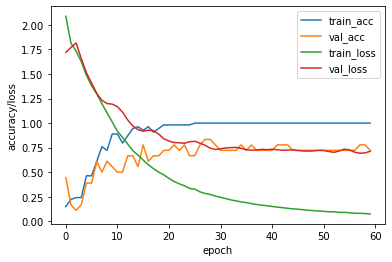

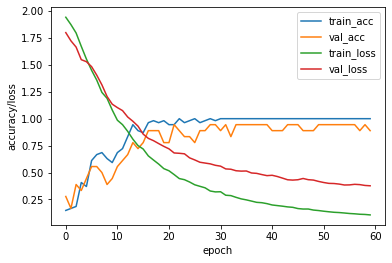

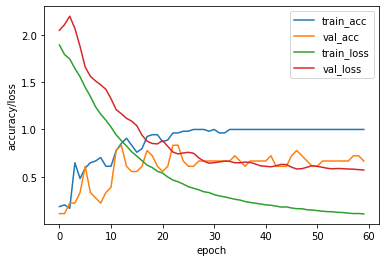

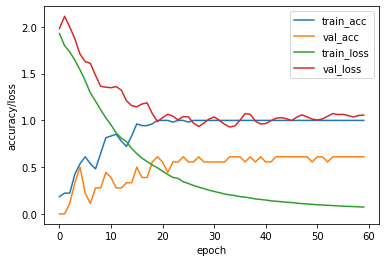

In [28]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [48]:
net2 = models.Sequential()
net2.add(layers.SeparableConv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=2))
net2.add(layers.Flatten())
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d_8 (Separabl (None, 479, 48)           348       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 239, 48)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 11472)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 80311     
Total params: 80,659
Trainable params: 80,659
Non-trainable params: 0
_________________________________________________________________


In [49]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [50]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 60, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/60
54/54 [==============================] - 0s 3ms/step - loss: 1.9879 - accuracy: 0.0926 - val_loss: 1.8236 - val_accuracy: 0.1667
Epoch 2/60
54/54 [==============================] - 0s 459us/step - loss: 1.8734 - accuracy: 0.2222 - val_loss: 1.7669 - val_accuracy: 0.1667
Epoch 3/60
54/54 [==============================] - 0s 315us/step - loss: 1.8038 - accuracy: 0.1667 - val_loss: 1.7043 - val_accuracy: 0.2778
Epoch 4/60
54/54 [==============================] - 0s 319us/step - loss: 1.7301 - accuracy: 0.3148 - val_loss: 1.6396 - val_accuracy: 0.3333
Epoch 5/60
54/54 [==============================] - 0s 315us/step - loss: 1.6487 - accuracy: 0.4074 - val_loss: 1.5587 - val_accuracy: 0.5000
Epoch 6/60
54/54 [==============================] - 0s 315us/step - loss: 1.5779 - accuracy: 0.5185 - val_loss: 1.4782 - val_accuracy: 0.5000
Epoch 7/60
54/54 [==============================] - 0s 334us/step - loss: 1.4950 - accuracy: 0.5926 - va

54/54 [==============================] - 0s 352us/step - loss: 0.1140 - accuracy: 1.0000 - val_loss: 0.6350 - val_accuracy: 0.7222
Epoch 59/60
54/54 [==============================] - 0s 343us/step - loss: 0.1094 - accuracy: 1.0000 - val_loss: 0.6466 - val_accuracy: 0.7778
Epoch 60/60
15/15 [==============================] - 0s 133us/step
[0.3074339032173157, 0.9333333373069763]
1
Train on 54 samples, validate on 18 samples
Epoch 1/60
54/54 [==============================] - 0s 352us/step - loss: 1.9635 - accuracy: 0.1111 - val_loss: 1.9069 - val_accuracy: 0.1667
Epoch 2/60
54/54 [==============================] - 0s 371us/step - loss: 1.9141 - accuracy: 0.2222 - val_loss: 1.7872 - val_accuracy: 0.3333
Epoch 3/60
54/54 [==============================] - 0s 315us/step - loss: 1.8509 - accuracy: 0.3148 - val_loss: 1.7081 - val_accuracy: 0.3889
Epoch 4/60
54/54 [==============================] - 0s 315us/step - loss: 1.8206 - accuracy: 0.3519 - val_loss: 1.6449 - val_accuracy: 0.3889
Epoc

54/54 [==============================] - 0s 315us/step - loss: 0.2783 - accuracy: 0.9815 - val_loss: 0.4128 - val_accuracy: 0.9444
Epoch 55/60
54/54 [==============================] - 0s 319us/step - loss: 0.2653 - accuracy: 0.9815 - val_loss: 0.4090 - val_accuracy: 0.9444
Epoch 56/60
54/54 [==============================] - 0s 315us/step - loss: 0.2562 - accuracy: 1.0000 - val_loss: 0.4060 - val_accuracy: 0.9444
Epoch 57/60
54/54 [==============================] - 0s 315us/step - loss: 0.2515 - accuracy: 0.9815 - val_loss: 0.4023 - val_accuracy: 0.9444
Epoch 58/60
54/54 [==============================] - 0s 334us/step - loss: 0.2442 - accuracy: 0.9815 - val_loss: 0.3887 - val_accuracy: 0.9444
Epoch 59/60
54/54 [==============================] - 0s 334us/step - loss: 0.2375 - accuracy: 1.0000 - val_loss: 0.3822 - val_accuracy: 0.9444
Epoch 60/60
15/15 [==============================] - 0s 134us/step
[0.5013917684555054, 0.800000011920929]
2
Train on 54 samples, validate on 18 samples
E

54/54 [==============================] - 0s 334us/step - loss: 0.2888 - accuracy: 0.9815 - val_loss: 0.5484 - val_accuracy: 0.7778
Epoch 51/60
54/54 [==============================] - 0s 315us/step - loss: 0.2775 - accuracy: 0.9815 - val_loss: 0.5493 - val_accuracy: 0.8333
Epoch 52/60
54/54 [==============================] - 0s 315us/step - loss: 0.2688 - accuracy: 0.9815 - val_loss: 0.5538 - val_accuracy: 0.8333
Epoch 53/60
54/54 [==============================] - 0s 315us/step - loss: 0.2593 - accuracy: 0.9815 - val_loss: 0.5431 - val_accuracy: 0.8333
Epoch 54/60
54/54 [==============================] - 0s 315us/step - loss: 0.2507 - accuracy: 0.9815 - val_loss: 0.5209 - val_accuracy: 0.8333
Epoch 55/60
54/54 [==============================] - 0s 334us/step - loss: 0.2418 - accuracy: 0.9815 - val_loss: 0.5105 - val_accuracy: 0.8333
Epoch 56/60
54/54 [==============================] - 0s 297us/step - loss: 0.2344 - accuracy: 0.9815 - val_loss: 0.5104 - val_accuracy: 0.8333
Epoch 57/60

54/54 [==============================] - 0s 315us/step - loss: 0.2504 - accuracy: 0.9815 - val_loss: 0.8839 - val_accuracy: 0.6111
Epoch 47/60
54/54 [==============================] - 0s 334us/step - loss: 0.2397 - accuracy: 0.9815 - val_loss: 0.8979 - val_accuracy: 0.6111
Epoch 48/60
54/54 [==============================] - 0s 352us/step - loss: 0.2300 - accuracy: 0.9815 - val_loss: 0.8942 - val_accuracy: 0.5556
Epoch 49/60
54/54 [==============================] - 0s 315us/step - loss: 0.2225 - accuracy: 0.9815 - val_loss: 0.8924 - val_accuracy: 0.6111
Epoch 50/60
54/54 [==============================] - 0s 315us/step - loss: 0.2138 - accuracy: 0.9815 - val_loss: 0.8708 - val_accuracy: 0.6111
Epoch 51/60
54/54 [==============================] - 0s 315us/step - loss: 0.2039 - accuracy: 1.0000 - val_loss: 0.8764 - val_accuracy: 0.6111
Epoch 52/60
54/54 [==============================] - 0s 334us/step - loss: 0.1966 - accuracy: 1.0000 - val_loss: 0.8819 - val_accuracy: 0.6111
Epoch 53/60

In [51]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.41774908 0.83333334]
Standard deviation for loss & accuracy:  [0.07143264 0.05773502]
Duration in seconds:  5


In [52]:
net1.save('enb34-2.h5')

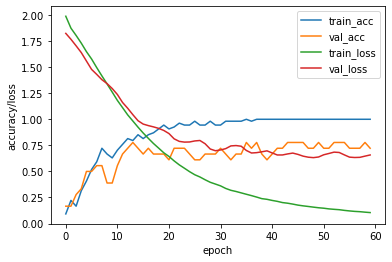

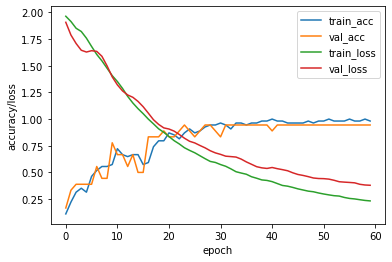

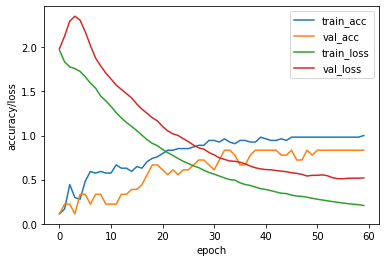

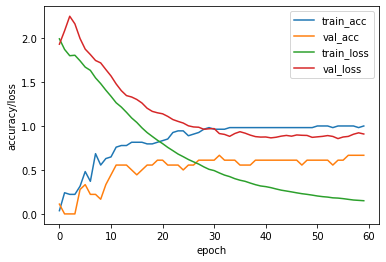

In [53]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [11]:
net3 = models.Sequential()
net3.add(layers.Dense((480), input_shape = (480,6)))
net3.add(layers.Flatten())
net3.add(layers.Dense(240,activation='relu'))
net3.add(layers.Dense(240,activation='relu'))
net3.add(layers.Dense(120,activation='relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_13 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_14 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 847       
Total params: 55,387,207
Trainable params: 55,387,207
Non-trainable params: 0
__________________________________________

In [12]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 1s 28ms/step - loss: 2.8887 - accuracy: 0.1481 - val_loss: 8.9812 - val_accuracy: 0.1667
Epoch 2/25
54/54 [==============================] - 1s 27ms/step - loss: 6.3321 - accuracy: 0.2222 - val_loss: 9.1852 - val_accuracy: 0.1111
Epoch 3/25
54/54 [==============================] - 1s 26ms/step - loss: 7.0666 - accuracy: 0.1481 - val_loss: 6.0833 - val_accuracy: 0.0000e+00
Epoch 4/25
54/54 [==============================] - 1s 26ms/step - loss: 4.3928 - accuracy: 0.1296 - val_loss: 2.1788 - val_accuracy: 0.1667
Epoch 5/25
54/54 [==============================] - 1s 26ms/step - loss: 1.8589 - accuracy: 0.2778 - val_loss: 1.4172 - val_accuracy: 0.5000
Epoch 6/25
54/54 [==============================] - 1s 27ms/step - loss: 1.7856 - accuracy: 0.4444 - val_loss: 1.5550 - val_accuracy: 0.1667
Epoch 7/25
54/54 [==============================] - 1s 26ms/step - loss: 1.6973 - accuracy: 0.3333 - val

In [13]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.4439797  0.76666668]
Standard deviation for loss & accuracy:  [0.10034725 0.05773502]
Duration in seconds:  145


<h2> Expriment4:</h2>

In [14]:
net4 = models.Sequential()
net4.add(layers.Dense((480), input_shape = (480,6)))
net4.add(layers.Flatten())
net4.add(layers.Dense(240,activation='relu'))
net4.add(layers.Dense(120,activation='relu'))
net4.add(layers.Dense(120,activation='relu'))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_4 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_18 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_19 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 847       
Total params: 55,343,887
Trainable params: 55,343,887
Non-trainable params: 0
__________________________________________

In [15]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 2s 30ms/step - loss: 4.0274 - accuracy: 0.1667 - val_loss: 5.0610 - val_accuracy: 0.1667
Epoch 2/25
54/54 [==============================] - 1s 27ms/step - loss: 6.5335 - accuracy: 0.1296 - val_loss: 6.1429 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 1s 27ms/step - loss: 5.5996 - accuracy: 0.1111 - val_loss: 5.3485 - val_accuracy: 0.1111
Epoch 4/25
54/54 [==============================] - 1s 26ms/step - loss: 3.7186 - accuracy: 0.2037 - val_loss: 2.0583 - val_accuracy: 0.2222
Epoch 5/25
54/54 [==============================] - 1s 27ms/step - loss: 1.8932 - accuracy: 0.3148 - val_loss: 1.9089 - val_accuracy: 0.3889
Epoch 6/25
54/54 [==============================] - 1s 27ms/step - loss: 2.0365 - accuracy: 0.3333 - val_loss: 1.8732 - val_accuracy: 0.1111
Epoch 7/25
54/54 [==============================] - 1s 27ms/step - loss: 1.7289 - accuracy: 0.2778 - val_los

In [16]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.54580935 0.75000001]
Standard deviation for loss & accuracy:  [0.06449396 0.05527708]
Duration in seconds:  145


<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
